<a href="https://colab.research.google.com/github/leakysam/Analysis-on-loan-data/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount the drive to access the files stored in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # Import libraries required for the project
  > I imported all the required libraries needed in the analysis here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
pd.set_option("max_colwidth", 200)



 ## These are the files to be used in the analysis

   > I read all files required and gave them a variable name

In [3]:
kiva = pd.read_csv('/content/drive/MyDrive/archive (1)/kiva_loans.csv')
mpi_region = pd.read_csv('/content/drive/MyDrive/archive (1)/kiva_mpi_region_locations.csv')
loan_theme = pd.read_csv('/content/drive/MyDrive/archive (1)/loan_theme_ids.csv')
loan_themes_region = pd.read_csv('/content/drive/MyDrive/archive (1)/loan_themes_by_region.csv')

## Show the file is read correctly

In [4]:
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


### Summary of dataframe read

In [5]:
kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

### Finding number or rows and columns in the dataset

In [6]:
kiva.shape

(671205, 20)

#### Obtain unique values of column country

In [7]:
kiva['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

### Finding missing values in the dataframe and calculating their sum

In [8]:
kiva.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

###Handling and showing missing Values in the dataframe
> Plotted simple graph to show the sum of the columns with missing values this is important so as to decide on how to handle the missing values. Since the column might be essential to the analysis to be done and some will not

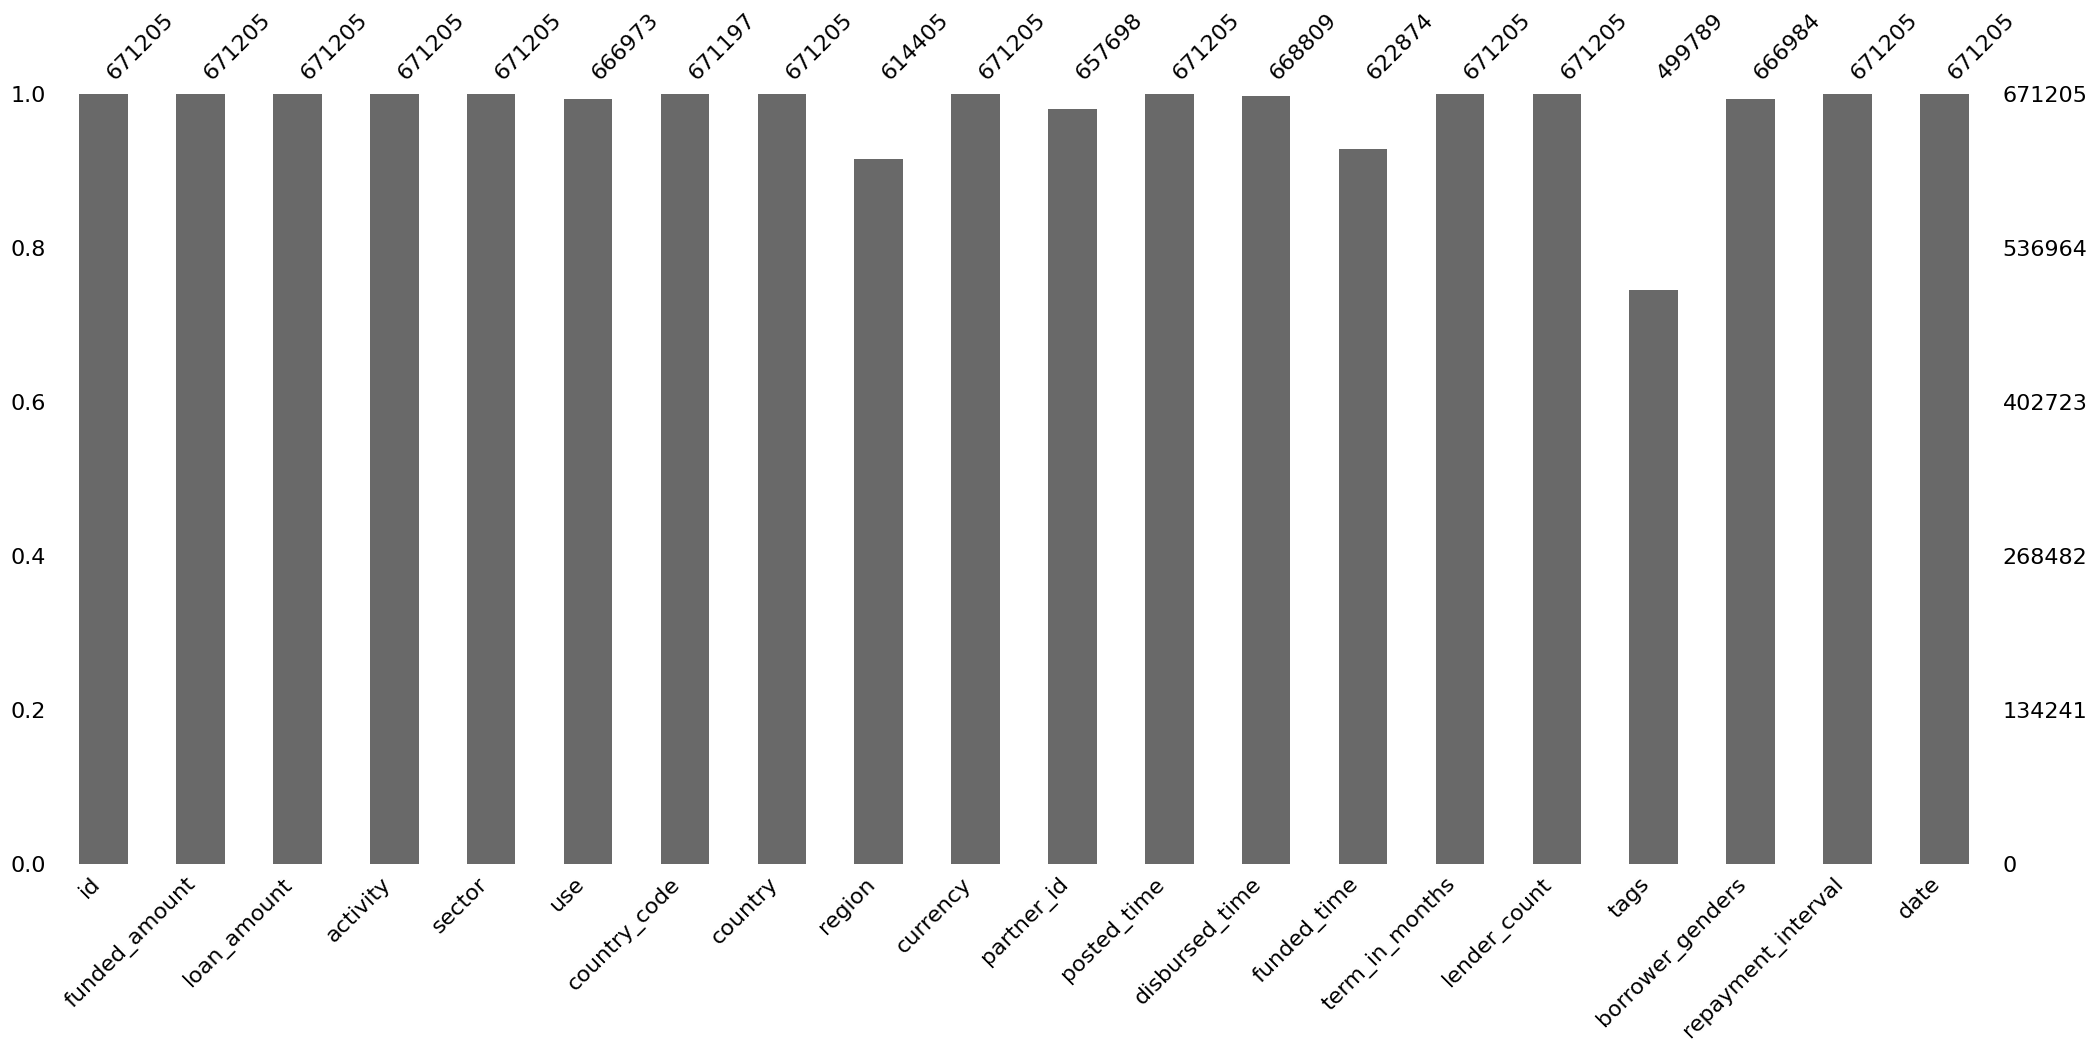

In [9]:
plt.figure(figsize=(10, 4))
# Plot the missing value matrix
msno.bar(kiva)
# Show the plot
plt.show()

### Show one column with missing values
 > Based on the graph above which showed 'tags' column had the most missing values. I showed the nature of the column below

In [10]:
kiva['tags']

0                                  NaN
1                                  NaN
2         user_favorite, user_favorite
3                                  NaN
4                                  NaN
                      ...             
671200                             NaN
671201                             NaN
671202                             NaN
671203                             NaN
671204                             NaN
Name: tags, Length: 671205, dtype: object

### Drop tags column
> I dropped the tags column since I won't be needing it in the analysis and show the dataframe without the tags column

In [11]:
#drop columns not needed with lots of missing values as indicated above the column name is tags
kiva.drop('tags',axis='columns', inplace=True)
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly,2014-01-01


### Handling missing values in needed columns
 >On observing the graph showing the missing values region column was among it. So instead of dropping the entire column or of the missing entries I renamed the missing values Unknown

In [12]:
#for the missing values in columns needed to do analysis replacement with defined value is done
kiva['region'].fillna('Unknown', inplace= True)

In [13]:
#show the changes made
kiva['region']

0               Lahore
1               Lahore
2            Maynaguri
3               Lahore
4         Abdul Hakeem
              ...     
671200      Concepción
671201         Unknown
671202         Unknown
671203         Unknown
671204         Unknown
Name: region, Length: 671205, dtype: object

In [14]:
#drop the missing value in the columns region and funded_time since we have enough data to do analysis with
kiva_cleaned_new = kiva.dropna(subset=['funded_time'])
kiva_cleaned_new.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variety of new embroidery materials.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly,2014-01-01


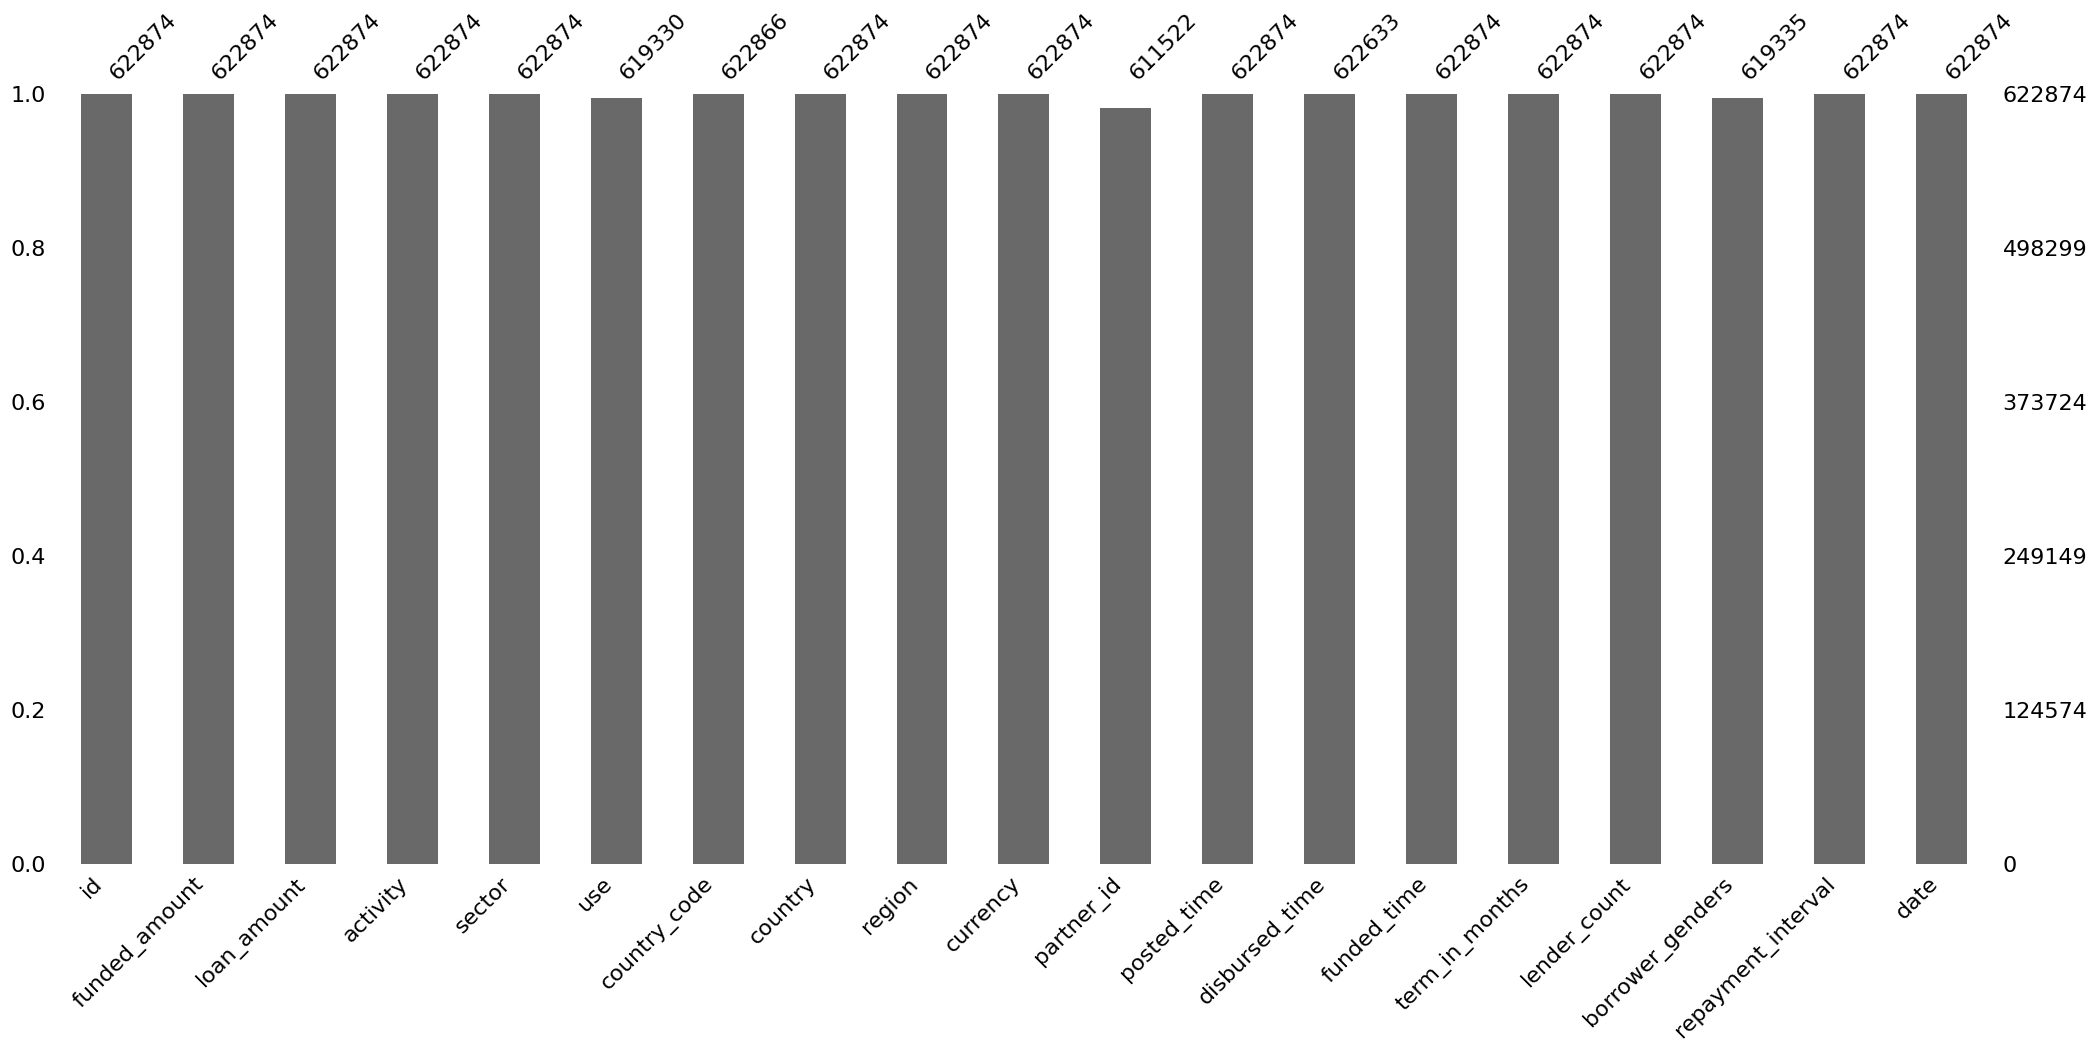

In [15]:
plt.figure(figsize=(10, 4))
# Plot the missing value matrix
msno.bar(kiva_cleaned_new)
# Show the plot
plt.show()

# 1. Country with the highest amount of loans
> I used value_counts and sort_values to Evaluate the countries and count how many times were given to it

In [16]:
country_loan_counts = kiva_cleaned_new['country'].value_counts().sort_values(ascending=False).reset_index()#read,count,sort the output in descending order and counts the number of occurrences of each unique value in the 'country' column
country_loan_counts.columns = ['country', 'loan_total_counts']#rename the id column into loan total counts

# Print the country_loan_counts
print("Country-wise Loan Counts:")
print(country_loan_counts)

Country-wise Loan Counts:
          country  loan_total_counts
0     Philippines             157607
1           Kenya              70379
2        Cambodia              33464
3     El Salvador              32723
4        Pakistan              24920
..            ...                ...
80        Vanuatu                  4
81    Afghanistan                  2
82     Mauritania                  1
83  Cote D'Ivoire                  1
84         Bhutan                  1

[85 rows x 2 columns]


### 1.2 Visualize
 >Created a function to plot the graph

In [17]:
def visualize_loan_counts(country_loan_counts):
    """
    Creates a bar chart to visualize loan counts by country.

    Parameters:
    country_loan_counts (DataFrame): DataFrame containing 'country' and 'loan_count' columns.
    """
    plt.figure(figsize=(15, 7))
    plt.bar(country_loan_counts['country'], country_loan_counts['loan_total_counts'])
    plt.xlabel('Country')
    plt.ylabel('Loan Count')
    plt.title('Loan Counts by Country')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

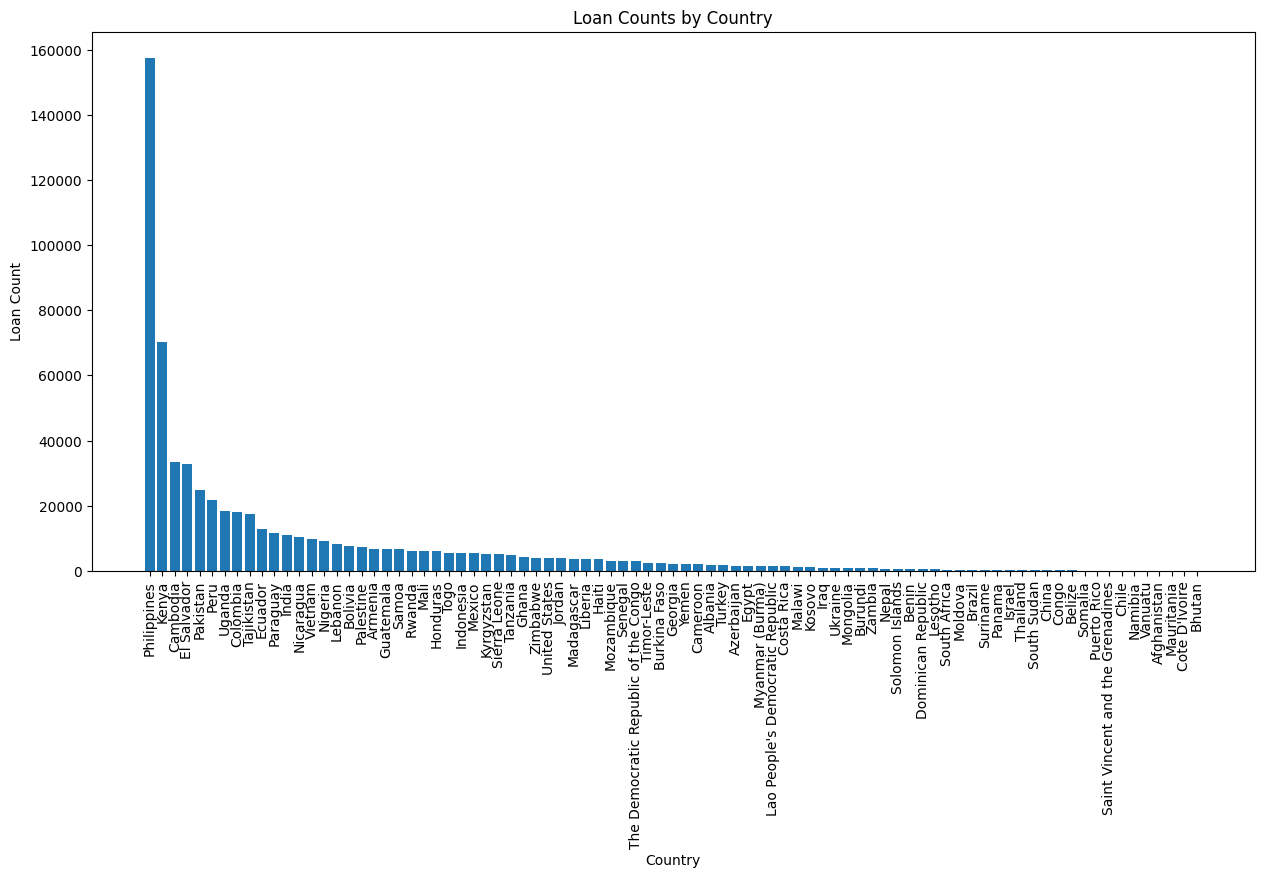

In [18]:
visualize_loan_counts(country_loan_counts)# call the function

# **2. Sector that received the most number of loans**
 >Used groupby and sort values to get sectors with the highest loant amount and arrange them in descending order. Loan amounts are gotten by adding loans given to different sectors

In [19]:
sector_loan_totals = kiva_cleaned_new.groupby('sector')['loan_amount'].sum().reset_index()
sector_loan_totals_sorted = sector_loan_totals.sort_values(by='loan_amount', ascending=False)
sector_loan_totals_sorted.reset_index(drop=True, inplace=True)#resets index of the sector_loan_totals_sorted and places a new index so as to have flowing index as opposed to mismatched ones
print(sector_loan_totals_sorted)

            sector  loan_amount
0      Agriculture  125498800.0
1             Food  109674775.0
2           Retail   84686175.0
3         Services   40344525.0
4         Clothing   32638125.0
5        Education   29375275.0
6          Housing   19089850.0
7     Personal Use   13448375.0
8             Arts   11675375.0
9   Transportation    8885450.0
10          Health    8743175.0
11    Construction    6054050.0
12   Manufacturing    5313350.0
13   Entertainment     967775.0
14       Wholesale     882950.0


## 2.1 Visualize

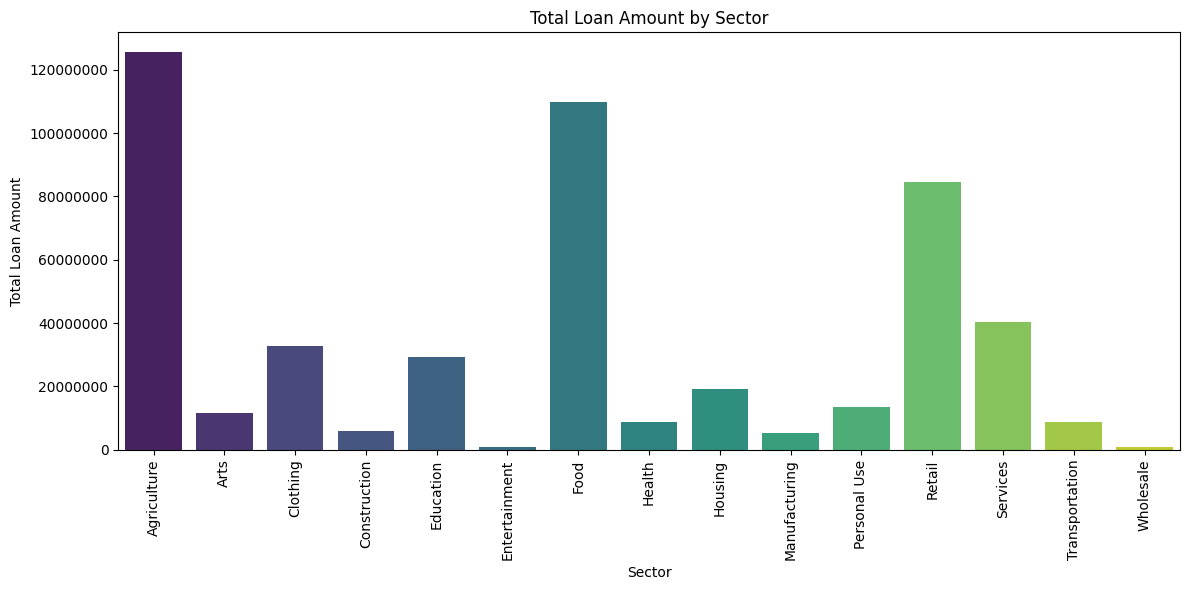

In [20]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='loan_amount', data=sector_loan_totals, palette='viridis')
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Sector')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# **3. Activity that received the highest loan amount within the top sector**

In [21]:
activity_loan_totals = kiva_cleaned_new.groupby(['sector','activity'])['loan_amount'].sum().reset_index() #look at three columns needed, group them then calculates the sum of loan amounts within each group
activity_loan_totals = activity_loan_totals.sort_values(by='loan_amount', ascending=False).reset_index(drop=True)
print(activity_loan_totals)

            sector                activity  loan_amount
0      Agriculture                 Farming   44891700.0
1           Retail           General Store   33216950.0
2      Agriculture             Agriculture   23926075.0
3             Food   Food Production/Sales   23353475.0
4           Retail                  Retail   22350025.0
..             ...                     ...          ...
158           Arts               Patchwork      14150.0
159       Services          Event Planning       7175.0
160  Manufacturing  Personal Care Products       3600.0
161       Services              Adult Care       3375.0
162   Personal Use            Celebrations       1400.0

[163 rows x 3 columns]


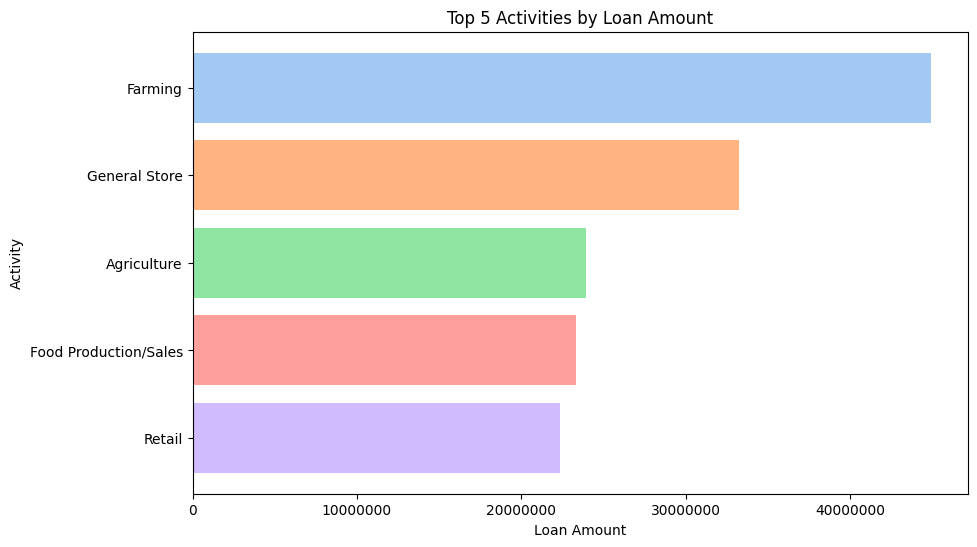

In [22]:
top_5_activity_loan_totals = activity_loan_totals.head(5)  # Select the top 5 rows

# Generate a list of distinct colors for bars
colors = sns.color_palette('pastel', len(top_5_activity_loan_totals))#returns the number of items in an object

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_5_activity_loan_totals['activity'], top_5_activity_loan_totals['loan_amount'], color=colors)
plt.xlabel('Loan Amount')
plt.ylabel('Activity')
plt.title('Top 5 Activities by Loan Amount')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

# **4. Region with the highest loan amount**

In [23]:
# Group by region and calculate the total loan amount for each region
region_loan_totals = kiva_cleaned_new.groupby('region')['loan_amount'].sum()

# Find the region with the highest loan amount
highest_loan_region = region_loan_totals.idxmax()

# List the top 10 regions in descending order of loan amount
top_10_regions = region_loan_totals.sort_values(ascending=False).head(10)
print(top_10_regions)

region
Unknown                      61864950.0
Goma, North Kivu province     7181725.0
Cusco                         6222075.0
La Paz  / El Alto             6174000.0
Dar es Salaam                 4541400.0
Lahore                        3540950.0
San Lorenzo                   3299200.0
Thanh Hoá                     3134575.0
Santa Cruz                    2655700.0
Ita                           2547275.0
Name: loan_amount, dtype: float64


In [24]:
# Group by region and calculate the total loan amount for each region
region_loan_totals = kiva_cleaned_new.groupby('region')['loan_amount'].sum()

# Exclude region with name 'unknown' from the calculation
region_loan_totals = region_loan_totals[region_loan_totals.index != 'Unknown']

# Find the region with the highest loan amount
highest_loan_region = region_loan_totals.idxmax()

# List the top 10 regions in descending order of loan amount
top_10_regions = region_loan_totals.sort_values(ascending=False).head(10)
# Convert the Series to a DataFrame and add column names
top_10_regions_df = top_10_regions.reset_index()
top_10_regions_df.columns = ['Region', 'Total Loan Amount']

# Print the DataFrame with column names
print(top_10_regions_df)

                      Region  Total Loan Amount
0  Goma, North Kivu province          7181725.0
1                      Cusco          6222075.0
2          La Paz  / El Alto          6174000.0
3              Dar es Salaam          4541400.0
4                     Lahore          3540950.0
5                San Lorenzo          3299200.0
6                  Thanh Hoá          3134575.0
7                 Santa Cruz          2655700.0
8                        Ita          2547275.0
9                      CUSCO          2488550.0


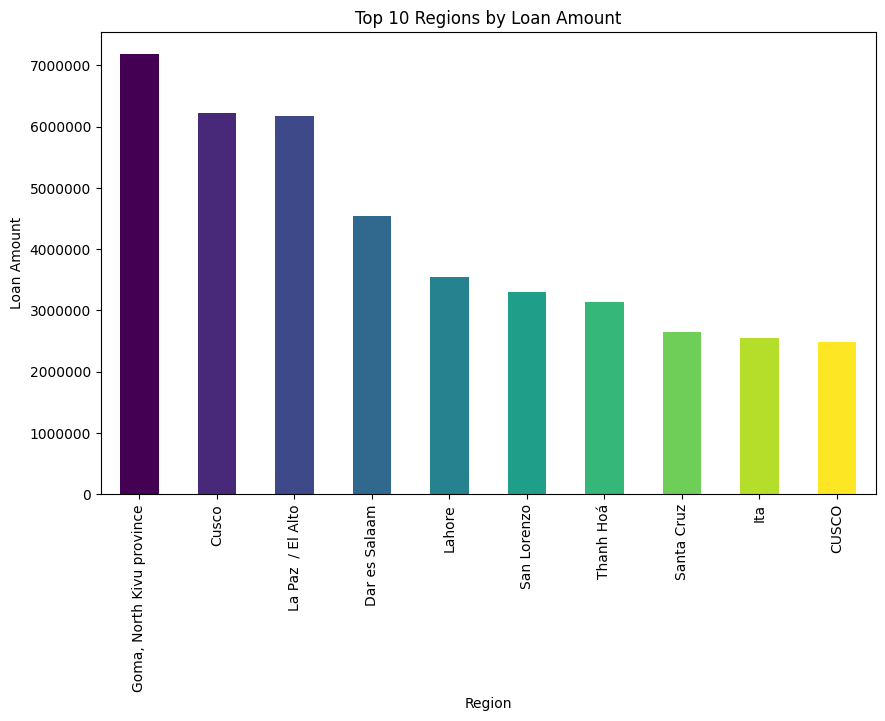

In [25]:
# Create a bar plot
# Generate a list of distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_regions_df)))#colormap called viridis map data to colors in a plot (np.linspace is used to generate array to determine the colors)
plt.figure(figsize=(10, 6))
top_10_regions.plot(kind='bar', color=colors)
plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.title('Top 10 Regions by Loan Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# **5. Loan amount varying across repayment intervals**

In [26]:
kiva_cleaned_new['repayment_interval'].value_counts()

monthly      311560
irregular    250376
bullet        60336
weekly          602
Name: repayment_interval, dtype: int64

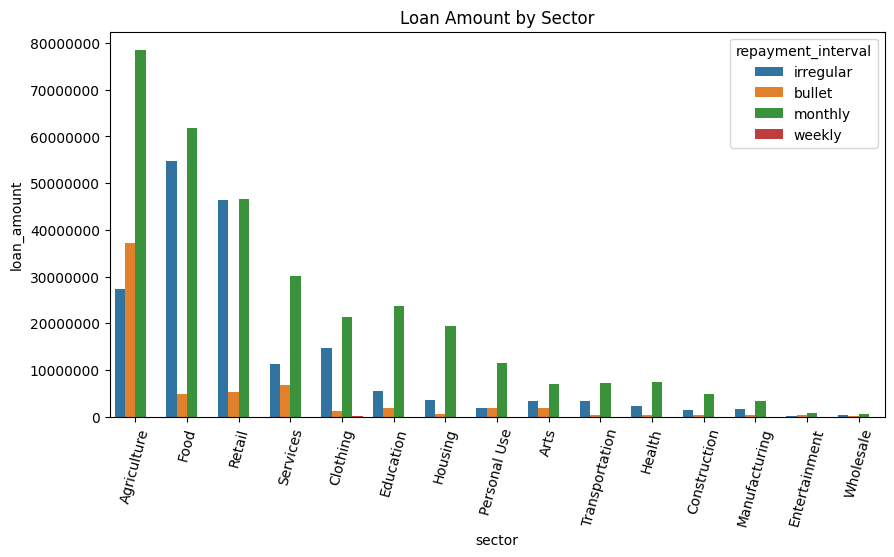

In [27]:
# Create a box plot to visualize loan amounts across repayment intervals
sector_order = kiva_cleaned_new.groupby('sector')['loan_amount'].sum().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
plt.title('Loan Amount by Sector')
plt.ticklabel_format(style='plain', axis='y')#retain the format of the y axis
plt.xticks(rotation = 75)
sns.barplot(data = kiva, x = 'sector', y = 'loan_amount', errorbar=None, estimator = np.sum, order = sector_order, hue = 'repayment_interval')
plt.show()

# **6. Distribution of loans between male and female recipients**
 >Drop empty rows in the column
 >>split the data in the rows since there are rows with multiple entries and remove spaces etc and plot pie chart

In [28]:
borrower_gender= kiva_cleaned_new['borrower_genders'].dropna()#drop empty to create a loop to count the genders

In [29]:
borrower_gender.values

array(['female', 'female, female', 'female', ..., 'female', 'female',
       'female'], dtype=object)

In [30]:
# Calculate the count of each gender
gender_counts = kiva_cleaned_new['borrower_genders'].str.split(', ').explode().value_counts()
gender_counts

female    1019223
male       238004
Name: borrower_genders, dtype: int64

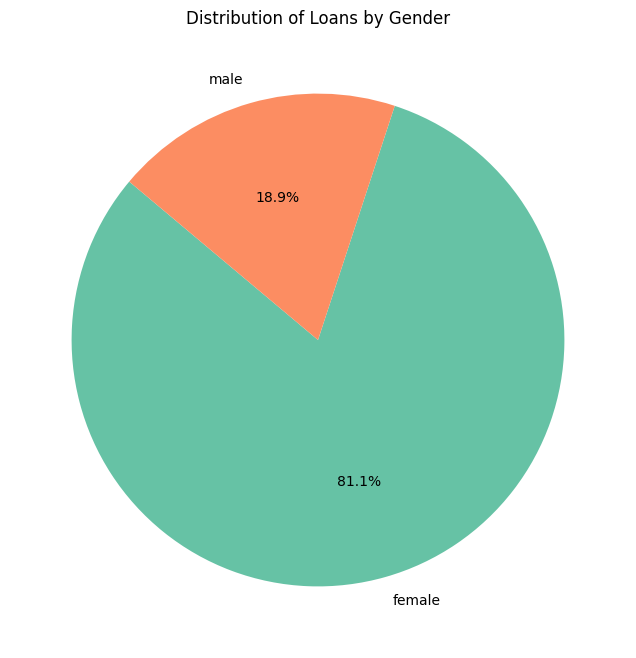

In [31]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Loans by Gender')
plt.show()

# **7. Country Subset.Choice Malawi**

In [32]:
#copy the kiva cleaned datset and filter by country Malawi
malawi = kiva_cleaned_new[kiva_cleaned_new['country'] == 'Malawi']
malawi.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
86542,738183,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 05:17:57+00:00,2014-08-29 07:00:00+00:00,2014-08-12 08:32:39+00:00,24.0,21,NaN,irregular,2014-07-14
86610,738390,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 12:07:41+00:00,2014-08-29 07:00:00+00:00,2014-08-12 09:20:28+00:00,24.0,22,NaN,irregular,2014-07-14
86766,738343,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 11:09:27+00:00,2014-08-29 07:00:00+00:00,2014-08-12 09:32:59+00:00,24.0,22,NaN,irregular,2014-07-14
86769,738331,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 10:38:41+00:00,2014-08-29 07:00:00+00:00,2014-08-12 08:31:32+00:00,24.0,22,NaN,irregular,2014-07-14
86945,738221,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 07:08:36+00:00,2014-08-29 07:00:00+00:00,2014-08-12 12:14:43+00:00,24.0,22,NaN,irregular,2014-07-14
103901,755811,1400.0,1400.0,Fish Selling,Food,to buy fish,MW,Malawi,Mangochi,MWK,381.0,2014-08-18 13:28:40+00:00,2014-07-29 07:00:00+00:00,2014-09-04 16:02:34+00:00,6.0,46,"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2014-08-18
108366,760231,1700.0,1700.0,Food Market,Food,To buy assorted food stuffs,MW,Malawi,Mangochi,MWK,381.0,2014-08-26 14:10:03+00:00,2014-08-04 07:00:00+00:00,2014-09-04 16:17:15+00:00,5.0,68,"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2014-08-26
108970,760230,2625.0,2625.0,Home Products Sales,Retail,To buy kitchenware,MW,Malawi,Mangochi,MWK,381.0,2014-08-26 14:08:46+00:00,2014-08-04 07:00:00+00:00,2014-09-04 18:15:47+00:00,5.0,100,"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2014-08-26
118670,770234,2400.0,2400.0,General Store,Retail,to buy assorted groceries.,MW,Malawi,Nkahatabay,MWK,381.0,2014-09-17 14:55:08+00:00,2014-09-01 07:00:00+00:00,2014-09-21 10:57:16+00:00,6.0,94,"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2014-09-17
122749,773626,1950.0,1950.0,Bakery,Food,"to buy flour, cooking oil and sugar.",MW,Malawi,Chikwawa,MWK,381.0,2014-09-23 14:51:12+00:00,2014-09-16 07:00:00+00:00,2014-09-28 17:11:37+00:00,6.0,76,"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2014-09-23


###Copy the dataframe so that it's country specific

In [33]:
# Make a copy of the 'kivo' DataFrame rename DF
malawi_dataframe = kiva_cleaned_new.copy()

# Filter the 'country' column to include only 'Malawi'
malawi_new_dataframe = malawi_dataframe[malawi_dataframe['country'] == 'Malawi']
malawi_new_dataframe

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
86542,738183,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 05:17:57+00:00,2014-08-29 07:00:00+00:00,2014-08-12 08:32:39+00:00,24.0,21,NaN,irregular,2014-07-14
86610,738390,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 12:07:41+00:00,2014-08-29 07:00:00+00:00,2014-08-12 09:20:28+00:00,24.0,22,NaN,irregular,2014-07-14
86766,738343,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 11:09:27+00:00,2014-08-29 07:00:00+00:00,2014-08-12 09:32:59+00:00,24.0,22,NaN,irregular,2014-07-14
86769,738331,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 10:38:41+00:00,2014-08-29 07:00:00+00:00,2014-08-12 08:31:32+00:00,24.0,22,NaN,irregular,2014-07-14
86945,738221,550.0,550.0,Pigs,Agriculture,NaN,MW,Malawi,Unknown,MWK,391.0,2014-07-14 07:08:36+00:00,2014-08-29 07:00:00+00:00,2014-08-12 12:14:43+00:00,24.0,22,NaN,irregular,2014-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662979,1325764,1125.0,1125.0,Mobile Transactions,Services,to secure a Zoona-branded booth and float for Christabel to become a mobile transactions agent.,MW,Malawi,Lilongwe,MWK,210.0,2017-06-22 11:15:13+00:00,2017-07-31 07:00:00+00:00,2017-07-03 15:58:57+00:00,12.0,33,female,bullet,2017-06-22
663279,1326792,1700.0,1700.0,Grocery Store,Food,to buy more grocery items,MW,Malawi,Lilongwe,MWK,381.0,2017-06-23 12:50:29+00:00,2017-05-25 07:00:00+00:00,2017-07-05 23:00:07+00:00,6.0,56,"female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2017-06-23
664933,1327910,800.0,800.0,Food Production/Sales,Food,to buy more flour and cooking oil,MW,Malawi,Balaka,MWK,381.0,2017-06-27 07:12:01+00:00,2017-05-27 07:00:00+00:00,2017-07-05 15:44:25+00:00,7.0,26,"female, female, female, female, female, female, female, female, female, female, female, female, female, female",irregular,2017-06-27
665544,1328544,850.0,850.0,Mobile Transactions,Services,to fund her start-up business as a Zoona mobile transactions agent so that she can bring financial inclusion and the creation of employment to her community,MW,Malawi,Lilongwe,MWK,210.0,2017-06-28 07:27:13+00:00,2017-08-31 07:00:00+00:00,2017-07-08 01:32:11+00:00,11.0,29,female,bullet,2017-06-28


In [34]:
malawi_new_dataframe['region'].unique()

array(['Unknown', 'Mangochi', 'Nkahatabay', 'Chikwawa', 'Nkhotakota',
       'Malili', 'MZUZU', 'Balaka', 'Zomba', 'Lilongwe', 'Likuni',
       'Chitipa', 'Mzimba', 'Karonga', 'Rumphi', 'Lunzu, Blantyre',
       'Salima', 'Lumbadzi, Lilongwe', 'Nkhatabay', 'Nkota-kota',
       'Blantyre', 'Ncheu', 'Kabula, Blantyre', 'Nkhata Bay', 'Liwonde',
       'Mulanje', 'Mchinji', 'Namitete', 'Dowa', 'Monkey bay', 'Mwanza',
       'Mitundu, Lilongwe', 'Ntchisi', 'Thyolo', 'Malosa, Zomba',
       'Chinteche', 'Kasungu', 'Area 49', 'Chigonthi/Lilongwe',
       'Area 25/C', 'Mitundu', 'malomo', 'Dedza', 'Phalombe', 'Nsanje',
       'Likoma Island', 'Nkhotakhota', 'Machinga', 'Ntcheu', 'Kasalika',
       'Chiputula'], dtype=object)

## **7.1 Sector within the chosen country which received the highest loans**

In [35]:
malawi_sector_loan_totals = malawi_new_dataframe.groupby('sector')['loan_amount'].sum().sort_values(ascending=False).reset_index()
print(malawi_sector_loan_totals)

           sector  loan_amount
0            Food     712850.0
1        Services     438700.0
2        Clothing     189675.0
3     Agriculture      99800.0
4          Retail      89775.0
5          Health      50000.0
6         Housing       8375.0
7    Construction       7525.0
8   Manufacturing       6300.0
9       Education       2900.0
10      Wholesale       1850.0
11           Arts       1600.0


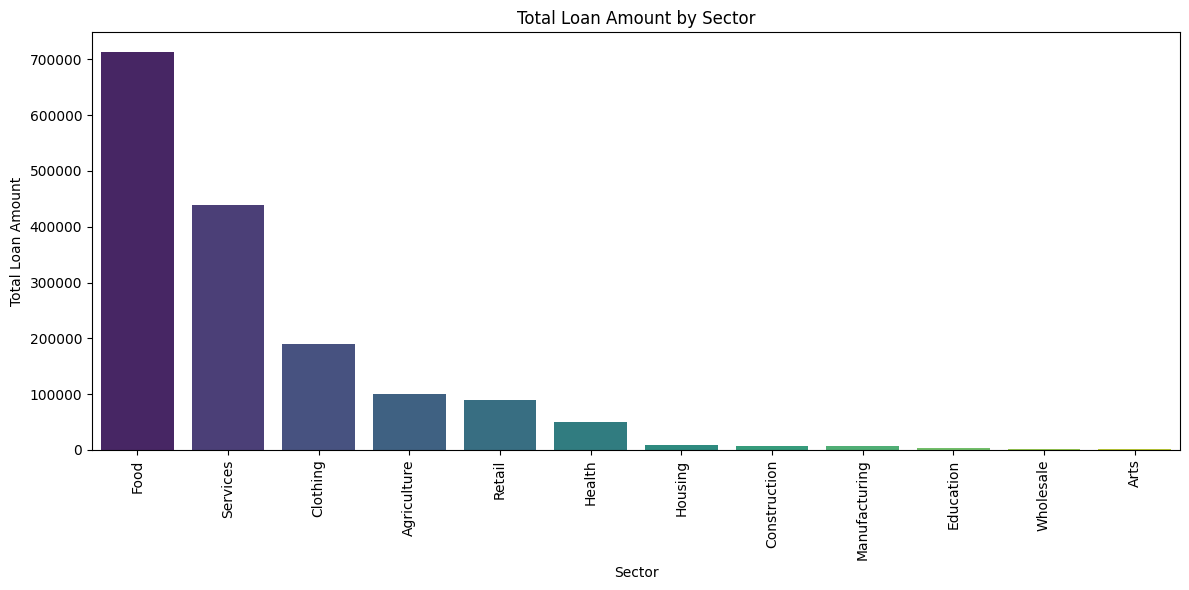

In [36]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='loan_amount', data=malawi_sector_loan_totals, palette='viridis')
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Sector')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## **7.2 Regions within the chosen country that received the highest loans**

In [37]:
# Group by region and calculate the total loan amount for each region
region_loan_totals = malawi_new_dataframe.groupby('region')['loan_amount'].sum()

# Find the region with the highest loan amount
highest_loan_region = region_loan_totals.idxmax()

# List the top 10 regions in descending order of loan amount
top_regions = region_loan_totals.sort_values(ascending=False).head(20).reset_index()
print(top_regions)

        region  loan_amount
0     Blantyre     382525.0
1     Lilongwe     323000.0
2     Chikwawa     116875.0
3        Zomba     102575.0
4     Mangochi      92800.0
5       Balaka      79850.0
6      Unknown      72075.0
7    Nkhatabay      68475.0
8      Mulanje      54400.0
9   Nkhotakota      47100.0
10  Nkahatabay      39150.0
11       MZUZU      35650.0
12      Mzimba      25575.0
13     Kasungu      16675.0
14      Ntcheu      13650.0
15     Mchinji      13350.0
16      Salima      13225.0
17  Nkhata Bay      10675.0
18     Karonga       9550.0
19      Rumphi       9200.0


## **7.2.1 Visualize**

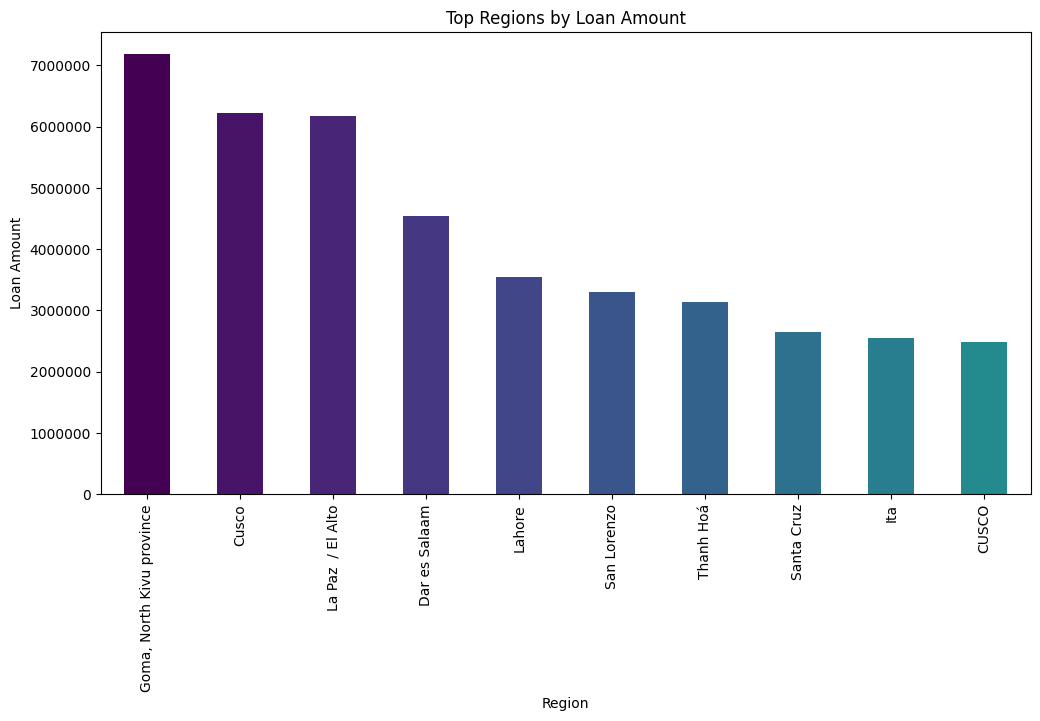

In [38]:
# Generate a list of distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_regions)))
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color=colors)
plt.xlabel('Region')
plt.ylabel('Loan Amount')
plt.title('Top Regions by Loan Amount')
plt.ticklabel_format(style='plain', axis='y')#retain the format of the y axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

## **7.3 Top 10 loan activities**

In [39]:
region_loan_totals = malawi_new_dataframe.groupby('activity')['loan_amount'].sum()
highest_loan_region = region_loan_totals.idxmax()

# List the top 10 activities
top_regions_activities = region_loan_totals.sort_values(ascending=False).head(10).reset_index()
print(top_regions_activities)

              activity  loan_amount
0             Services     349000.0
1        Grocery Store     202850.0
2        Used Clothing     113600.0
3  Fruits & Vegetables     109900.0
4              Cereals      91000.0
5         Fish Selling      87650.0
6  Mobile Transactions      76250.0
7       Clothing Sales      57275.0
8               Health      50000.0
9           Restaurant      39600.0


## **7.3.1 Visualize**

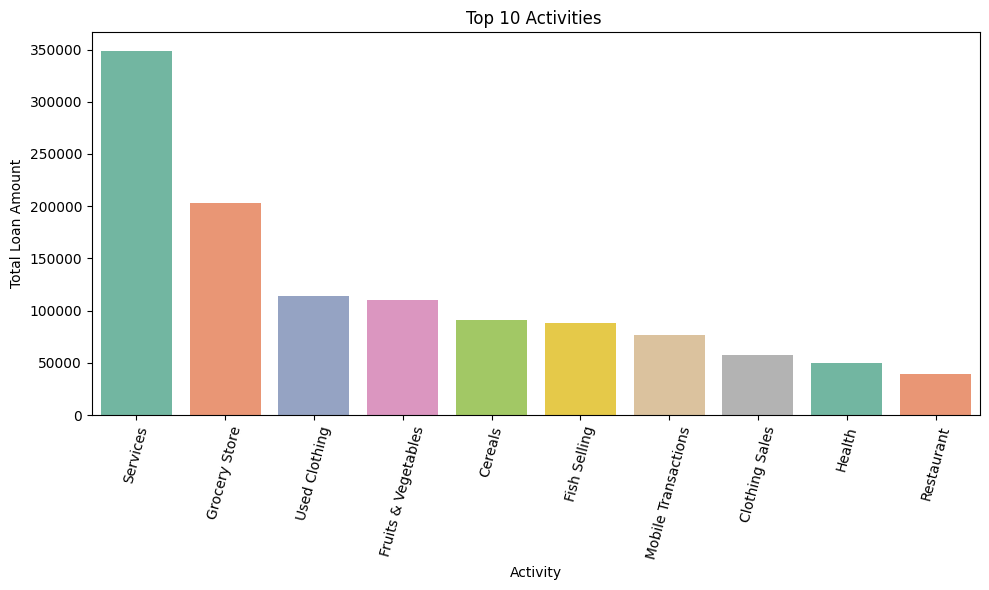

In [40]:
# Calculate a suitable color palette
colors = sns.color_palette("Set2", len(top_regions))

# Create a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(data=top_regions_activities, x='activity', y='loan_amount', palette=colors)
plt.xlabel('Activity')
plt.ylabel('Total Loan Amount')
plt.title('Top 10 Activities ')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

## **7.4 Most prominent field partners**
>using the kiva datset you can answer this question using partner ids and count their entries

In [41]:
# Group by field partner and calculate the total loan amount for each partner
partner_loan_totals = malawi_new_dataframe.groupby('partner_id')['loan_amount'].sum()

# Identify the most prominent field partners (partners with the highest total loan amount)
most_prominent_partners = partner_loan_totals.sort_values(ascending=False).head(10).reset_index()
print(most_prominent_partners)

   partner_id  loan_amount
0       381.0    1105800.0
1       210.0     235000.0
2       444.0     194225.0
3       431.0      50000.0
4       391.0      24325.0


##  7.5 Names of field partners from loan_themes_by_region.csv along with their total loan amounts from kiva_loans.csv.
 >Combine two different csv's and merge using a common column 'sector' and then change Partner ID column to partner_id


In [42]:
loan_themes_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [43]:
# Make a copy of the loan_themes_region DataFrame
malawi_new_loan_theme = loan_themes_region.copy()

# Filter the 'country' column to include only 'Malawi'
malawi_copy_theme_df = malawi_new_loan_theme[malawi_new_loan_theme['country'] == 'Malawi']
malawi_copy_theme_df

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
11553,210,Zoona,Mobile Money and ICT,a1050000005zLVL,Franchise Package,Malawi,No,Balaka,NaN,MWI,...,6250,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11554,210,Zoona,Mobile Money and ICT,a1050000004DfJy,Mobile transactions - electronic float advance,Malawi,No,Balaka,NaN,MWI,...,1975,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11555,210,Zoona,Mobile Money and ICT,a1050000000R2R3,Mobile Transactions,Malawi,No,Balaka,NaN,MWI,...,2650,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11556,210,Zoona,Mobile Money and ICT,a1050000004DfKc,Mobile transactions - capital growth loan.,Malawi,No,Blantyre,NaN,MWI,...,800,"Blantyre, Malawi","[(-15.7666707, 35.0167866)]",Blantyre; Blantyre; Southern Region; Malawi,"(-15.7666707, 35.0167866)",-15.766671,35.016787,"Blantyre City, Malawi","(-15.7666707, 35.0167866)",20.0
11557,210,Zoona,Mobile Money and ICT,a1050000005zLVL,Franchise Package,Malawi,No,Blantyre,NaN,MWI,...,51150,"Blantyre, Malawi","[(-15.7666707, 35.0167866)]",Blantyre; Blantyre; Southern Region; Malawi,"(-15.7666707, 35.0167866)",-15.766671,35.016787,"Blantyre City, Malawi","(-15.7666707, 35.0167866)",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Lilongwe,NaN,MWI,...,7950,"Lilongwe, Malawi","[(-13.9626121, 33.7741195)]",Lilongwe; Lilongwe; Central Region; Malawi,"(-13.9626121, 33.7741195)",-13.962612,33.774119,"Lilongwe City, Malawi","(-13.9626121, 33.7741195)",NaN
14542,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Mzimba,NaN,MWI,...,5700,"Mzimba, Malawi","[(-11.7475452, 33.5280072)]",Mzimba; Northern Region; Malawi,"(-11.7475452, 33.5280072)",-11.747545,33.528007,"Mzimba, Malawi","(-11.7475452, 33.5280072)",NaN
14543,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Nkhata Bay,NaN,MWI,...,975,"Nkhata Bay, Malawi","[(-11.6085556, 34.2949409)]",Nkhata Bay; Nkhata Bay; Northern Region; Malawi,"(-11.6085556, 34.2949409)",-11.608556,34.294941,"Nkhatabay, Malawi","(-11.6085556, 34.2949409)",NaN
14544,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Ntchisi,NaN,MWI,...,950,"Ntchisi, Malawi","[(-13.2841992, 33.88577470000001)]",Ntchisi; Central Region; Malawi,"(-13.2841992, 33.88577470000001)",-13.284199,33.885775,"Ntchisi, Malawi","(-13.2841992, 33.88577470000001)",NaN


In [44]:
loan_themes_region.info()#summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

##Merge the csvs using a common column

In [45]:
malawi_copy_theme_df['Field Partner Name'].unique()

array(['Zoona', 'MicroLoan Foundation (MLF) Malawi',
       'Nexus For Development', 'Zoona - Malawi'], dtype=object)

In [46]:
merged_df = pd.merge(malawi_copy_theme_df, malawi_new_dataframe, on='sector', how='inner')#sector is the common column
malawi_copy_theme_df = pd.DataFrame(malawi_copy_theme_df)
malawi_copy_theme_df.rename(columns={'Partner ID': 'partner_id'}, inplace=True)#change column name
malawi_copy_theme_df

,partner_id,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
11553,210,Zoona,Mobile Money and ICT,a1050000005zLVL,Franchise Package,Malawi,No,Balaka,NaN,MWI,...,6250,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11554,210,Zoona,Mobile Money and ICT,a1050000004DfJy,Mobile transactions - electronic float advance,Malawi,No,Balaka,NaN,MWI,...,1975,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11555,210,Zoona,Mobile Money and ICT,a1050000000R2R3,Mobile Transactions,Malawi,No,Balaka,NaN,MWI,...,2650,"Balaka, Malawi","[(-15.0506595, 35.0828588)]",Balaka; Southern Region; Malawi,"(-15.0506595, 35.0828588)",-15.050660,35.082859,"Balaka, Malawi","(-15.0506595, 35.0828588)",20.0
11556,210,Zoona,Mobile Money and ICT,a1050000004DfKc,Mobile transactions - capital growth loan.,Malawi,No,Blantyre,NaN,MWI,...,800,"Blantyre, Malawi","[(-15.7666707, 35.0167866)]",Blantyre; Blantyre; Southern Region; Malawi,"(-15.7666707, 35.0167866)",-15.766671,35.016787,"Blantyre City, Malawi","(-15.7666707, 35.0167866)",20.0
11557,210,Zoona,Mobile Money and ICT,a1050000005zLVL,Franchise Package,Malawi,No,Blantyre,NaN,MWI,...,51150,"Blantyre, Malawi","[(-15.7666707, 35.0167866)]",Blantyre; Blantyre; Southern Region; Malawi,"(-15.7666707, 35.0167866)",-15.766671,35.016787,"Blantyre City, Malawi","(-15.7666707, 35.0167866)",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Lilongwe,NaN,MWI,...,7950,"Lilongwe, Malawi","[(-13.9626121, 33.7741195)]",Lilongwe; Lilongwe; Central Region; Malawi,"(-13.9626121, 33.7741195)",-13.962612,33.774119,"Lilongwe City, Malawi","(-13.9626121, 33.7741195)",NaN
14542,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Mzimba,NaN,MWI,...,5700,"Mzimba, Malawi","[(-11.7475452, 33.5280072)]",Mzimba; Northern Region; Malawi,"(-11.7475452, 33.5280072)",-11.747545,33.528007,"Mzimba, Malawi","(-11.7475452, 33.5280072)",NaN
14543,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Nkhata Bay,NaN,MWI,...,975,"Nkhata Bay, Malawi","[(-11.6085556, 34.2949409)]",Nkhata Bay; Nkhata Bay; Northern Region; Malawi,"(-11.6085556, 34.2949409)",-11.608556,34.294941,"Nkhatabay, Malawi","(-11.6085556, 34.2949409)",NaN
14544,444,Zoona - Malawi,Mobile Money and ICT,a1050000004VokG,Mobile Transactions,Malawi,No,Ntchisi,NaN,MWI,...,950,"Ntchisi, Malawi","[(-13.2841992, 33.88577470000001)]",Ntchisi; Central Region; Malawi,"(-13.2841992, 33.88577470000001)",-13.284199,33.885775,"Ntchisi, Malawi","(-13.2841992, 33.88577470000001)",NaN


###Names of field partners along with the total number of loans they facilitated.

In [47]:
merged_df = pd.merge(malawi_copy_theme_df, malawi_new_dataframe, on='partner_id', how='inner')

# Group by 'Field Partner Name' and calculate total loan amounts
#partner_loan_amounts = merged_df.groupby('partner_id')['loan_amount','Field Partner Name'].sum().reset_index()
partner_loan_amounts = merged_df.groupby(['partner_id', 'Field Partner Name'])['loan_amount'].sum().reset_index()

# Sort partners by total loan amounts (optional)
partner_loan_amounts = partner_loan_amounts.sort_values(by='loan_amount', ascending=False)
print(partner_loan_amounts.head())

   partner_id                 Field Partner Name  loan_amount
1         381  MicroLoan Foundation (MLF) Malawi   17692800.0
0         210                              Zoona   15745000.0
3         444                     Zoona - Malawi    1942250.0
2         431              Nexus For Development      50000.0


In [48]:
# Use value_counts to count occurrences of each partner_id
partner_id_counts = merged_df['partner_id'].value_counts().reset_index()

# Rename columns for clarity
partner_id_counts.columns = ['partner_id', 'loan_counts']

# Print the partner_id counts
print(partner_id_counts.head())

   partner_id  loan_counts
0         381        14352
1         210        13869
2         444         1490
3         431            1


**Comment:**
>*  The most prominent field partner is MicroLoan Foundation (MLF) Malawi.



### Primary reasons for granting loans.

> To determine the primary reasons for granting loans, I'll focus on the use column and sum of loan amount by performing groupby on the use column then arrange them in descending order using the ascending=False.

In [49]:
# Use groupby to determine the reasons for granting loans
reason_fund_totals = malawi_new_dataframe.groupby('use')['loan_amount'].sum()

# Determining the max
highest_primary_resions = reason_fund_totals.idxmax()

# List the top 10
top_reasons = reason_fund_totals.sort_values(ascending=False).head(10).reset_index()
print(top_reasons['use'].str.strip())

0              to mitigate CO2 & household air pollution, while also saving wood, money, & time by selling efficient cookstoves in Malawi.
1                                                                                                                         to buy more fish
2                                                                                                                    to buy more groceries
3                                                                                                                      to buy more clothes
4                                                                                                                   to buy more vegetables
5                                                                                                                        to buy more maize
6    to start running her own business as a Zoona mobile money transfer agent so that she can provide financial services to her community.
7                          

In [50]:
# Top reasons for granting loans
print("The top ten reasons for granting loans are: ")
for reason in top_reasons['use']:
  print(reason.title())

The top ten reasons for granting loans are: 
To Mitigate Co2 & Household Air Pollution, While Also Saving Wood, Money, & Time By Selling Efficient Cookstoves In Malawi.
To Buy More Fish
To Buy More Groceries
To Buy More Clothes
To Buy More Vegetables
To Buy More Maize
To Start Running Her Own Business As A Zoona Mobile Money Transfer Agent So That She Can Provide Financial Services To Her Community.
To Buy Fish
To Generate Enough Capital To Expand His Mobile Money Transfer Business In Malawi
To Buy Assorted Groceries.


### Visualize the top regions ranked by loan amount.

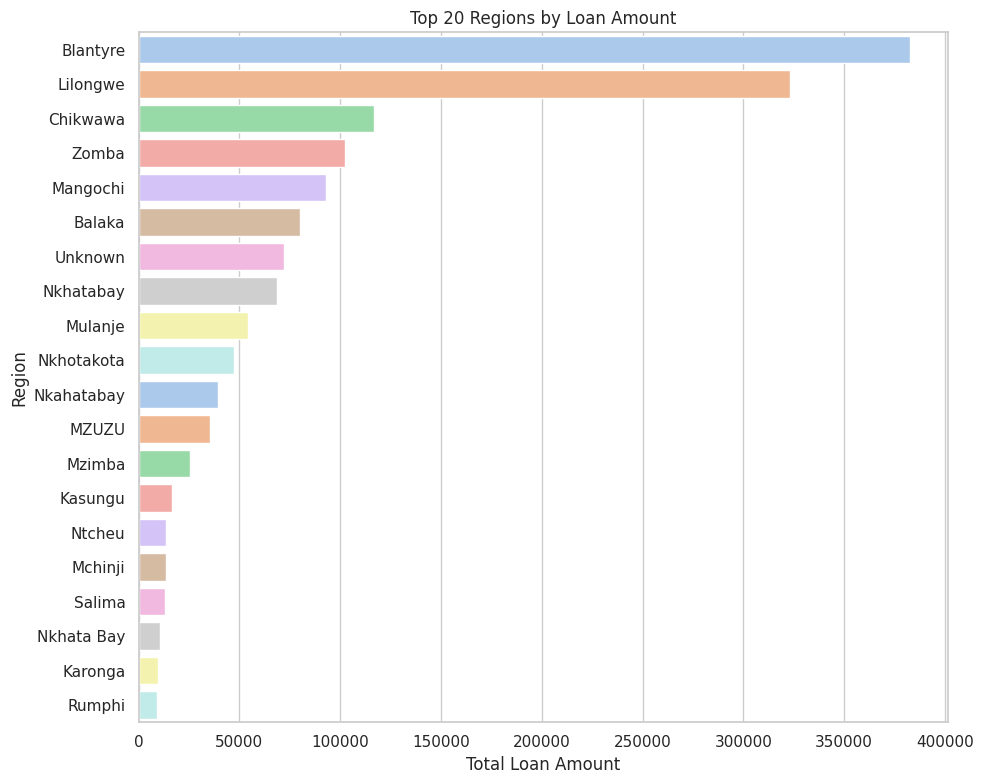

In [51]:
# Group by region and calculate the total loan amount for each region
region_loan_totals = malawi_new_dataframe.groupby('region')['loan_amount'].sum()

# Find the region with the highest loan amount
highest_loan_region = region_loan_totals.idxmax()

# List the top 10 regions in descending order of loan amount
top_regions = region_loan_totals.sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Choose a color palette (you can use any valid seaborn color palette)
colors = sns.color_palette("pastel", len(top_regions))

# Create a horizontal bar plot with different colors for each bar
ax = sns.barplot(x='loan_amount', y='region', data=top_regions, palette=colors)

# Set labels and title
ax.set(xlabel='Total Loan Amount', ylabel='Region', title='Top 20 Regions by Loan Amount')
plt.tight_layout()

# Show the plot
plt.show()

### Heatmap to explore correlations among numerical values.

<ipython-input-52-534c94127c1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = malawi_new_dataframe.corr()


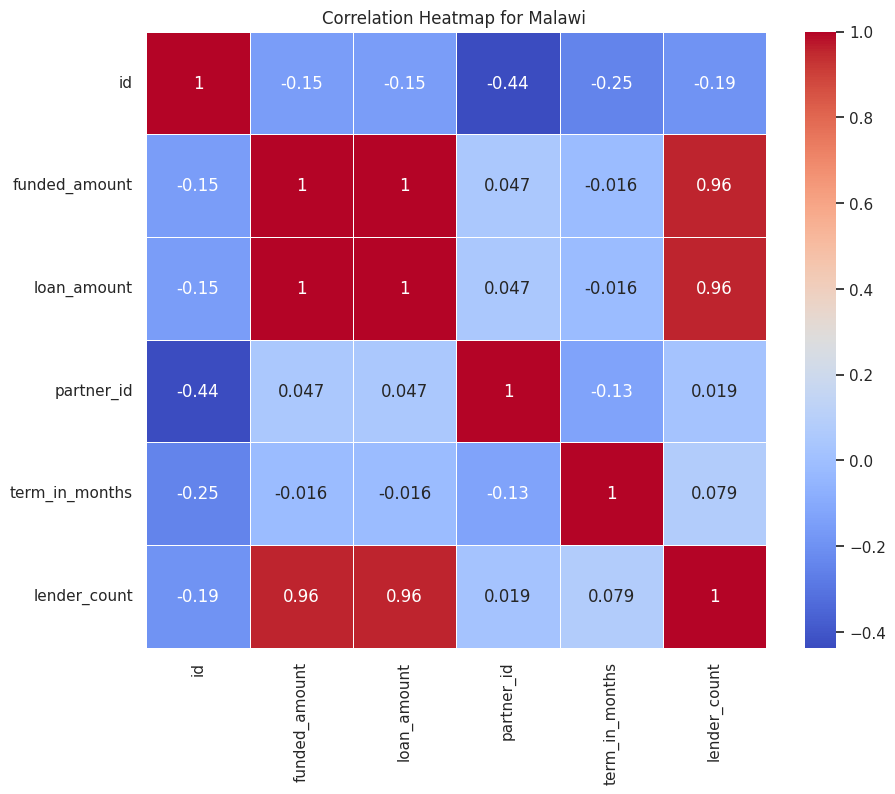

In [52]:
# Calculate the correlation matrix
correlation_matrix = malawi_new_dataframe.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap for Malawi ')

# Show the plot
plt.show()

### Boxplot analysis of regions against funded amounts

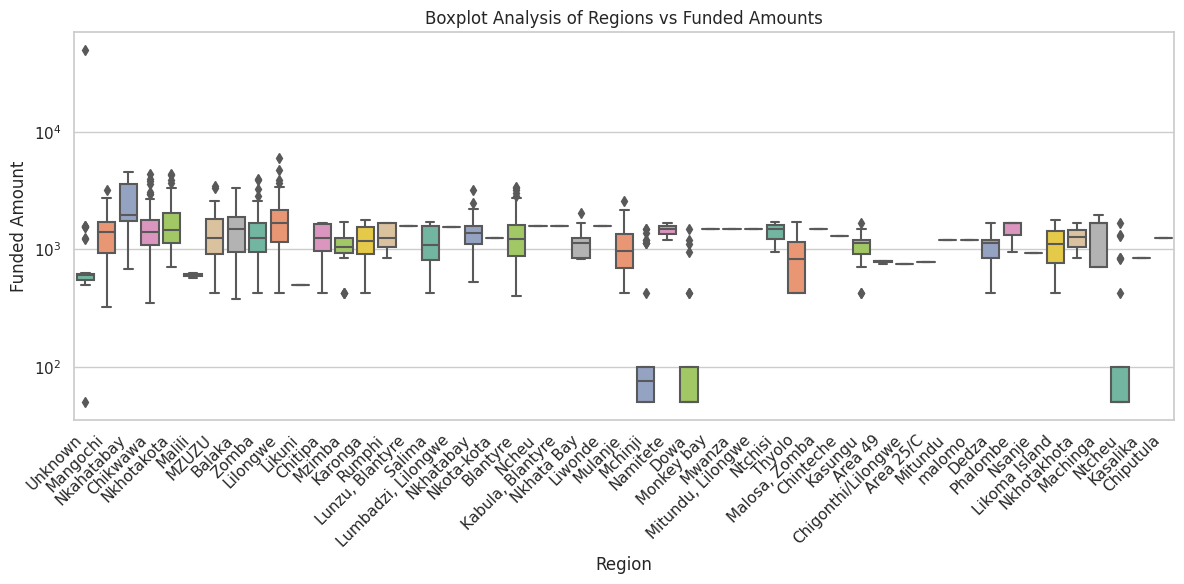

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='funded_amount', data=malawi_new_dataframe, palette='Set2', whis=1.5)#wider range of data and highlight potential outliers 1.5 time the interquatile range

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Funded Amount')
plt.title('Boxplot Analysis of Regions vs Funded Amounts')
plt.ticklabel_format(style='plain', axis='y')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set a logarithmic scale for y-axis to handle a wide range of funded_amount
plt.yscale('log')  # Use a logarithmic scale for better visualization if funded_amount has a wide range

# Show the plot
plt.tight_layout()
plt.show()

### Examine repayment intervals across different regions.

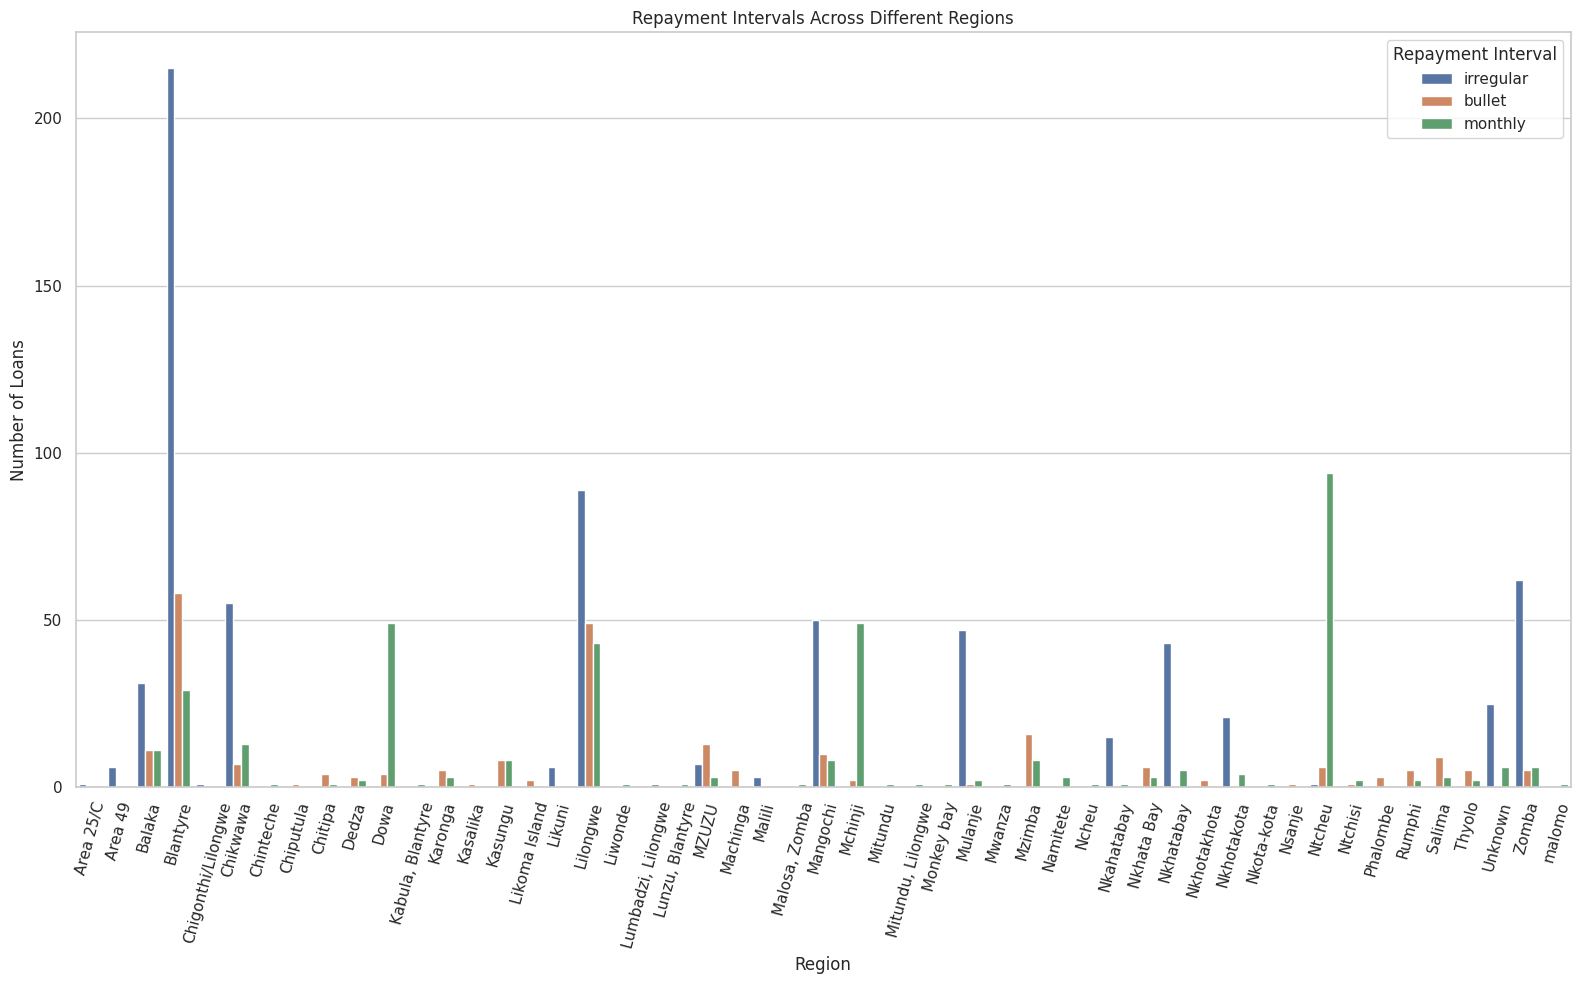

In [54]:
# Count the number of loans for each repayment interval in each region
repayment_counts = malawi_new_dataframe.groupby(['region', 'repayment_interval']).size().reset_index(name='count')

# Plot the data using a bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x='region', y='count', hue='repayment_interval', data=repayment_counts)
plt.xlabel('Region')
plt.ylabel('Number of Loans')
plt.title('Repayment Intervals Across Different Regions')
plt.xticks(rotation=75)
plt.legend(title='Repayment Interval')

# Show the plot
plt.tight_layout()#adjust subplots to fit figarea
plt.show()

In [55]:
mpi_region.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [56]:
# Make a copy of the mpi_region DataFrame
malawi_mpi_region = mpi_region.copy()

# Filter the 'country' column to include only 'Malawi'
copy_mpi_df = malawi_mpi_region[malawi_mpi_region['country'] == 'Malawi']
copy_mpi_df

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
611,"Balaka, Malawi",MWI,Malawi,Balaka,Sub-Saharan Africa,0.283,"(-15.0506595, 35.0828588)",-15.050660,35.082859
612,"Blantyre City, Malawi",MWI,Malawi,Blantyre City,Sub-Saharan Africa,0.118,"(-15.7666707, 35.0167866)",-15.766671,35.016787
613,"Blantyre Rural, Malawi",MWI,Malawi,Blantyre Rural,Sub-Saharan Africa,0.245,"(1000.0, 1000.0)",NaN,NaN
614,"Chikwawa, Malawi",MWI,Malawi,Chikwawa,Sub-Saharan Africa,0.292,"(-16.0437784, 34.8016945)",-16.043778,34.801695
615,"Chitipa, Malawi",MWI,Malawi,Chitipa,Sub-Saharan Africa,0.161,"(-9.7037655, 33.2700253)",-9.703765,33.270025
616,"Chradzulu, Malawi",MWI,Malawi,Chradzulu,Sub-Saharan Africa,0.241,"(-15.7423151, 35.2587964)",-15.742315,35.258796
617,"Dedza, Malawi",MWI,Malawi,Dedza,Sub-Saharan Africa,0.314,"(-14.3816618, 34.3254842)",-14.381662,34.325484
618,"Dowa, Malawi",MWI,Malawi,Dowa,Sub-Saharan Africa,0.267,"(-13.6514687, 33.9359756)",-13.651469,33.935976
619,"Karonga, Malawi",MWI,Malawi,Karonga,Sub-Saharan Africa,0.204,"(-9.952536, 33.9248222)",-9.952536,33.924822
620,"Kasungu, Malawi",MWI,Malawi,Kasungu,Sub-Saharan Africa,0.244,"(-13.0356794, 33.4719832)",-13.035679,33.471983


In [57]:
# Create a DataFrame
df = pd.DataFrame(copy_mpi_df)

# Plotting the map
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        text="LocationName",
                        color="MPI",
                        size="MPI",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=20,
                        zoom=5,
                        title="MPI in Malawi Regions",
                        mapbox_style="carto-positron")

# Show the map
fig.show()